## Basic
#### Python ⇔ R: object types
type(a)  ⇔ class(a)   #### "class" is better than "typeof"
#### Python ⇔ R: variable assignment
a=5      ⇔ a<-5       #### a=5 also works for R
#### Python list ⇔ R vector:
a = [1,3,5,7]                ⇔  a <- c(1,3,5,7)
a = [i for i in range(3,9)]  ⇔  a <- c(3:9)
#### Python 'for loop':
for val in [1,3,5]:
    print(val)
#### R 'for loop':
for (val in c(1,3,5)){
    print(val)
}
#### Python function:
def new_function(a, b=5):
    return a+b
#### R function:
new_function <- function(a, b=5) {
    return (a+b)
}
### Info
#### Python ⇔ R
df.head()       ⇔  head(df)
df.head(3)      ⇔  head(df,3)
df.tail(3)      ⇔  tail(df,3)
df.shape[0]     ⇔  nrow(df)
df.shape[1]     ⇔  ncol(df)
df.shape        ⇔  dim(df)
df.info()       ⇔  NO EQUIVALENT
df.describe()   ⇔  summary(df)     #### similar, not exactly the same
NO EQUIVALENT   ⇔  str(df)
### Importing/Exporing
#### Python  
import pandas as pd
df = pd.read_csv("input.csv",
                 sep    = ",",
                 header = 0)
df.to_csv("output.csv", index = False)
#### R 
df <- read.csv("input.csv", 
               header = TRUE,
               na.strings=c("","NA"),    
               sep = ",")
write.csv(df, "output.csv", row.names = FALSE)
#### na.strings: make sure NAs are not read as empty strings
### New Df
#### Python
import pandas as pd
df = pd.DataFrame(dict(col_a=['a','b','c'], col_b=[1,2,3]))
#### R
col_a <- c('a','b','c')
col_b <- c(1,2,3)
df <- data.frame(col_a, col_b)
### Filter
#### Python: row filtering  
df[(df['column_1'] > 3) &    
   (df['column_2'].isnull())]
#### R: row filtering  
df[(df$column_1 > 3) &    
   (is.na(df$column_2)), ] 
OR
library(dplyr)
df %>% filter((column_1 > 3) & (is.na(column_2)))
#### Python ⇔ R: column filtering (keep columns) 
df[['c1', 'c2']] ⇔  df[c('c1', 'c2')]   #### OR: df[,c('c1', 'c2')]
#### Python ⇔ R(with dplyr): column filtering (drop columns)
df.drop(['c1', 'c2'], axis=1)  ⇔  df %>% select(-c('c1', 'c2'))
#### Python ⇔ R: select columns by position
df.iloc[:,2:5]  ⇔  df[c(3:5)]           #### Note the indexing
#### Python: check if a column contains specific values
df[df['c1'].isin(['a','b'])]
OR
df.query('c1 in ("a", "b")')
#### R: check if a column contains specific values
df[df$c1 %in% c('a', 'b'), ]
OR
library(dplyr)
df %>% filter(c1 %in% c('a', 'b'))
### Missing Value
#### Python: missing value imputation 
df['c1'] = df['c1'].fillna(0)  
OR
df.fillna(value={'c1': 0})
#### R: missing value imputation
df$c1[is.na(df$c1)] <- 0
OR 
df$c1 = ifelse(is.na(df$c1) == TRUE, 0, df$c1)
OR
library(dplyr)
library(tidyr)
df %>% mutate(c1 = replace_na(c1, 0))
#### Python ⇔ R: number of missing values in a column
df['c1'].isnull().sum()  ⇔  sum(is.na(df$c1))
### Stats
#### Python ⇔ R: count value frequency (Similar)
df['c1'].value_counts()              ⇔ table(df$c1)
df['c1'].value_counts(dropna=False)  ⇔ table(df$c1, useNA='always')
df['c1'].value_counts(ascending=False) 
⇔ sort(table(df$c1), decreasing = TRUE)
#### Python ⇔ R: unique columns (including missing values) 
df['c1'].unique()      ⇔  unique(df$c1)
len(df['c1'].unique()) ⇔  length(unique(df$c1))
#### Python ⇔ R: column max / min / mean
df['c1'].max()         ⇔  max(df$c1,  na.rm = TRUE)
df['c1'].min()         ⇔  min(df$c1,  na.rm = TRUE)
df['c1'].mean()        ⇔  mean(df$c1, na.rm = TRUE)
### Grouping
#### Python: max / min / sum / mean / count
tbl = df.groupby('c1').agg({'c2':['max', 'min', 'sum'],
                            'c3':['mean'],
                            'c1':['count']}).reset_index()
tbl.columns = ['c1', 'c2_max', 'c2_min', 'c2_sum', 
               'c3_mean', 'count']
OR (for chained operations)
tbl = df.groupby('c1').agg(c2_max=  ('c2', max),
                           c2_min=  ('c2', min),
                           c2_sum=  ('c2', sum),
                           c3_mean= ('c2', 'mean'),
                           count=   ('c1', 'count')).reset_index()
#### R: max / min / sum / mean / count
library(dplyr)
df %>% group_by(c1) %>% 
       summarise(c2_max  = max(c2, na.rm = T),
                 c2_min  = min(c2, na.rm = T),
                 c2_sum  = sum(c2, na.rm = T),
                 c3_mean = mean(c3, na.rm = T),
                 count   = n())       
#### Python: count distinct
df.groupby('c1')['c2'].nunique()\
                      .reset_index()\
                      .rename(columns={'c2':'c2_cnt_distinct'})
#### R: count distinct
library(dplyr)
tbl <- df %>% group_by(c1) 
          %>% summarise(c2_cnt_distinct = n_distinct(c2))
### New Col/Alter
#### Python: rename columns
df.rename(columns={'old_col': 'new_col'})         
#### R: rename columns
library(dplyr)
df %>% rename(new_col = old_col)
#### Python: value mapping
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
#### R: value mapping
library(dplyr)
df$Sex <- mapvalues(df$Sex, 
          from=c('male', 'female'), 
          to=c(0,1))
#### Python ⇔ R: change data type
df['c1'] = df['c1'].astype(str)    ⇔  df$c1 <- as.character(df$c1)
df['c1'] = df['c1'].astype(int)    ⇔  df$c1 <- as.integer(df$c1)
df['c1'] = df['c1'].astype(float)  ⇔  df$c1 <- as.numeric(df$c1)
#### Python ⇔ R: 
df.loc[df['c1']=='A', 'c2'] = 99  ⇔  df[df$c1=='A', 'c2'] <- 99
#### Python: inner join / left join
import pandas as pd
merged_df1 = pd.merge(df1, df2, on='c1', how='inner')
merged_df2 = pd.merge(df1, df2, on='c1', how='left')
OR (for chained operations)
merged_df1 = df1.merge(df2, on='c1', how='inner')
merged_df2 = df1.merge(df2, on='c1', how='left')
#### R: inner join / left join
merged_df1 <- merge(x=df1,y=df2,by='c1')
merged_df2 <- merge(x=df1,y=df2,by='c1',all.x=TRUE)
OR 
library(dplyr)
merged_df1 <- inner_join(x=df1,y=df2,by='c1')
merged_df2 <- left_join(x=df1,y=df2,by='c1')
#### Python: sorting
df.sort_values(by=['c1','c2'], ascending = [True, False])
#### R: sorting 
library(dplyr)
df %>% arrange(c1, desc(c2))
#### Python (import pandas as pd) ⇔ R: concatenation
pd.concat([df1, df2, df3])     ⇔ rbind(df1, df2, df3)
pd.concat([df1, df2], axis=1)  ⇔ cbind(df1, df2)
#### Python random sample
df.sample(n=3, random_state=42)
#### R random sample
set.seed(42)
sample_n(df, 3)
#### Python: chained operations with '.'
df.drop('c1', axis=1)\
  .sort_values(by='c2', ascending=False)\
  .assign(c3 = lambda x: x['c1']*3 + 2)\
  .fillna(value={'c2': 0, 'c4':-99})\
  .rename(columns={'total': 'TOT'})\
  .query('c3 > 10')
#### R: chained operations with '%>%'
library(dplyr)
library(tidyr)
df %>% select(-c('c1')) %>%
       arrange(desc(c2)) %>%
       mutate(c3 = c1*3 + 2) %>%
       mutate(c2 = replace_na(c2, 0),
              c4 = replace_na(c4, -99)) %>%
       rename(TOT = total) %>%            
       filter(c3 > 10)

In [11]:
mydata <- tibble(
    year = 2012:2016,
    y = c(123, 39, 78, 52, 110)
) %>%
as_tsibble(index = year)
mydata

year,y
<int>,<dbl>
2012,123
2013,39
2014,78
2015,52
2016,110


In [18]:
library(tidyquant)

Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:tsibble’:

    index


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



################################### WARNING ###################################
# We noticed you have dplyr installed. The dplyr lag() function breaks how    #
# base R's lag() function is supposed to work, which breaks lag(my_xts).      #
#                                                                             #
# Calls to lag(my_xts) that you enter or source() into this session won't     #
# work correctly.                                                             #
#                                                                             #
# All package code is unaffected because it is protected by the R namespace   #
# mechanism.                                                       

In [20]:
gafa_stock

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2014-01-02,79.38286,79.57571,78.86000,79.01857,66.96433,58671200
AAPL,2014-01-03,78.98000,79.10000,77.20428,77.28286,65.49342,98116900
AAPL,2014-01-06,76.77857,78.11429,76.22857,77.70428,65.85053,103152700
AAPL,2014-01-07,77.76000,77.99429,76.84571,77.14857,65.37959,79302300
AAPL,2014-01-08,76.97285,77.93714,76.95571,77.63715,65.79363,64632400
AAPL,2014-01-09,78.11429,78.12286,76.47857,76.64571,64.95345,69787200
AAPL,2014-01-10,77.11857,77.25714,75.87286,76.13429,64.52003,76244000
AAPL,2014-01-13,75.70143,77.50000,75.69714,76.53286,64.85782,94623200
AAPL,2014-01-14,76.88857,78.10429,76.80857,78.05572,66.14838,83140400


In [22]:
gafa_stock %>% filter(Symbol == 'AAPL', year(Date) == 2017)
#gafa_stock %>% select(Date, Symbol, Close)

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2017-01-03,115.80,116.33,114.76,116.15,112.1400,28781900
AAPL,2017-01-04,115.85,116.51,115.75,116.02,112.0145,21118100
AAPL,2017-01-05,115.92,116.86,115.81,116.61,112.5841,22193600
AAPL,2017-01-06,116.78,118.16,116.47,117.91,113.8392,31751900
AAPL,2017-01-09,117.95,119.43,117.94,118.99,114.8820,33561900
AAPL,2017-01-10,118.77,119.38,118.30,119.11,114.9978,24462100
AAPL,2017-01-11,118.74,119.93,118.60,119.75,115.6157,27588600
AAPL,2017-01-12,118.90,119.30,118.21,119.25,115.1330,27086200
AAPL,2017-01-13,119.11,119.62,118.81,119.04,114.9302,26111900


In [26]:
gafa_stock %>% filter(Symbol == 'AAPL') %>% mutate(rtn_log = difference(log(Close)))


Symbol,Date,Open,High,Low,Close,Adj_Close,Volume,rtn
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2014-01-02,79.38286,79.57571,78.86000,79.01857,66.96433,58671200,NA
AAPL,2014-01-03,78.98000,79.10000,77.20428,77.28286,65.49342,98116900,-2.221069e-02
AAPL,2014-01-06,76.77857,78.11429,76.22857,77.70428,65.85053,103152700,5.438206e-03
AAPL,2014-01-07,77.76000,77.99429,76.84571,77.14857,65.37959,79302300,-7.177296e-03
AAPL,2014-01-08,76.97285,77.93714,76.95571,77.63715,65.79363,64632400,6.312890e-03
AAPL,2014-01-09,78.11429,78.12286,76.47857,76.64571,64.95345,69787200,-1.285231e-02
AAPL,2014-01-10,77.11857,77.25714,75.87286,76.13429,64.52003,76244000,-6.694998e-03
AAPL,2014-01-13,75.70143,77.50000,75.69714,76.53286,64.85782,94623200,5.221502e-03
AAPL,2014-01-14,76.88857,78.10429,76.80857,78.05572,66.14838,83140400,1.970270e-02


In [ ]:
#group_by_key()

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


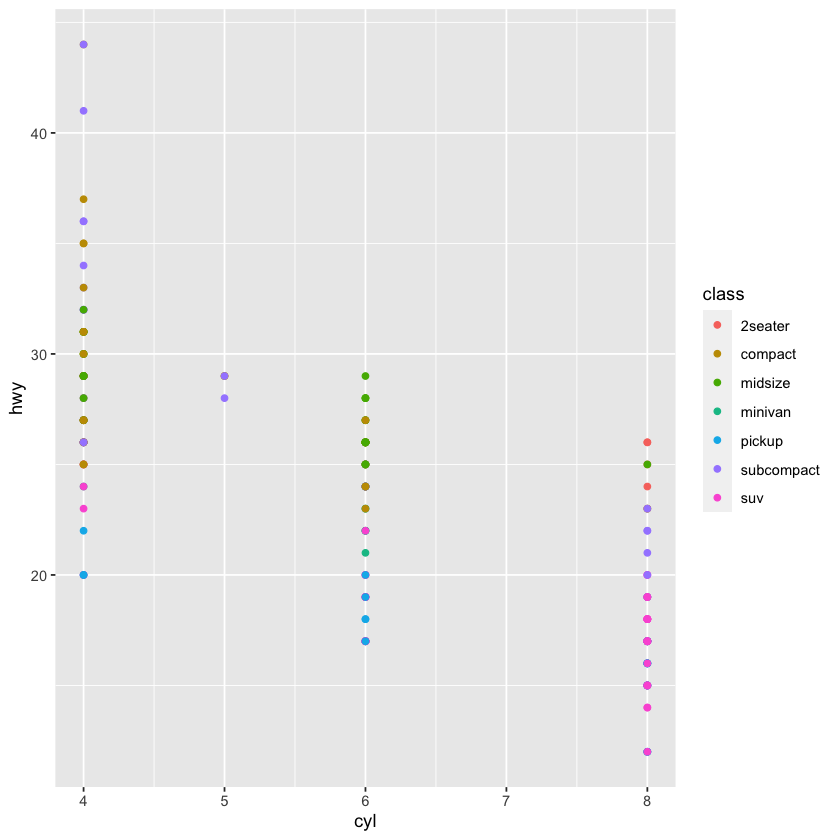

In [9]:
ggplot(data = mpg) + geom_point(mapping = aes(x = cyl, y = hwy, color = class)) # aes = aesthetic
#geom point adds layer of points to plot which creates scatterlpot
#each geom function takes mapping, defines how variables are ampped